In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy import ndimage
import cv2 as cv

import scipy
from PIL import Image

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

Populating the interactive namespace from numpy and matplotlib


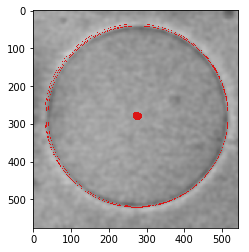

El diametro de la vesícula es: 484 pixeles


In [2]:
# Load picture and detect edges
Im1 = pylab.imread("ves_full_150_002.jpg")
Im1 = Im1[:,:,0]
Im1 = ndimage.gaussian_filter(Im1, 4)
sx = ndimage.sobel(Im1, axis=0, mode='constant')
sy = ndimage.sobel(Im1, axis=1, mode='constant')
sob = np.hypot(sx, sy)
edges = canny(Im1 , sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(200, 300, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
imagen = color.gray2rgb(Im1)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    rr, cc = circle(center_y, center_x, 10)
    imagen[circy, circx] = (220, 20, 20)
    imagen[rr, cc] = (220, 20, 20)

ax.imshow(imagen, cmap=plt.cm.gray)
plt.show()
print('El diametro de la vesícula es: '+str(radius*2)+' pixeles')